# Метрики оценки классификации

После того, как мы классифицировали данные, нам нужно понять насколько хорошо работает наш классификатор.

Существует множество различных классификаторов:
- метод опорных векторов
- логистическая регрессия
- дерево решений
и т.д.

Пока мы с вами посмотрели только логистическую регрессию, так как же нам ее теперь оценивать?

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bank.csv to bank.csv


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

bank = pd.read_csv("bank.csv", sep=';')
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

bank['y'] = le.fit_transform(bank['y'])
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,0
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,0
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,0
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,0


In [ ]:
bank = pd.get_dummies(bank, columns=['job', 'marital', 'education', 'default','housing','loan'])

x = bank.drop(['contact', 'day', 'month','y','poutcome'], axis = 1) #вектор признаков 
y = bank['y'] #вектор ответов 

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

model = LogisticRegression()
model.fit(X_train, y_train) #обучаем модель 

otvets_pred = model.predict(X_test)

print(model.score(X_test,y_test)) #оцениваем
print('         ')

# otvets_pred - ответы, которые выдала наша модель для X_test
# y_test - правильные ответы для X_test

0.8865143699336773
         


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**Матрица ошибок или confusion matrix**

Матрица неточностей – это матрица размера N на N, где N — это количество классов. Столбцы этой матрицы резервируются за экспертными решениями, а строки за решениями классификатора.

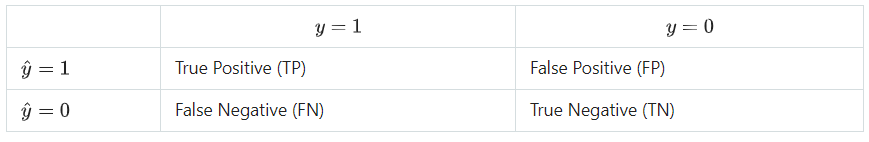

Здесь y^ — это ответ алгоритма на объекте, а y — истинная метка класса на этом объекте.

- TP — истино-положительное решение (класс 1 класифицирован как класс 1)
- TN — истино-отрицательное решение (класс 0 классифицирован как класс 0)
- FP — ложно-положительное решение (ошибка 1-го рода, ML-модель предсказала положительный результат 1, а на самом деле он отрицательный 0) - по сути это ложное срабатывание
- FN — ложно-отрицательное решение (ошибка 2-го рода – ML-модель предсказала отрицательный 0 результат, но на самом деле он положительный 1) - по сути это ложны пропуск

**Например:**
Есть больница и пациенты, наш классификатор определяет больной или нет.

Если наш классификатор определил что больной пациент здоровый - то это ложный пропус

Если наш классификатор определил что здоровой пациент больной - это ложное срабатывание

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

confusion_matrix(y_test, otvets_pred)

array([[1168,   26],
       [ 128,   35]])

In [ ]:
df_y = pd.DataFrame(y_test)
df_y.value_counts()

y
0    1194
1     163
dtype: int64

1168+128 - это кол-во записей класса 0

26+35 - это кол-во записей класса 1

In [ ]:
X_test.shape

(1357, 31)

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, otvets_pred).ravel()
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)
print("TP:", tp)

TN: 1168
FP: 26
FN: 128
TP: 35


**Accuracy**

измеряет количество верно классифицированных объектов относительно общего количества всех объектов. Это доля правильных ответов.

Используя confusion matrix можно рассчитать accuracy следующим образом:


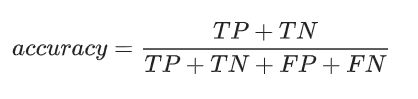

Расчитайте самостоятельно, вручную accuracy, используя confusion matrix.

In [ ]:
accuracy_score(y_test, otvets_pred)

0.8865143699336773

**Recall** (полнота)
 
Сколько объектов наша модель смогла правильно классифицировать с позитивной меткой из всего множества позитивных (т.е. как много объектов класса 1 находит наш классификатор).

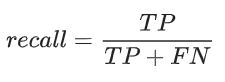

Расчитайте самостоятельно, вручную recall, используя confusion matrix.

In [ ]:
recall_score(y_test, otvets_pred)

0.2147239263803681

**Precision** (точность)

Можно интерпретировать как долю объектов, названных классификатором положительными и при этом действительно являющимися положительными. Насколько мы можем доверять нашему классификатору.

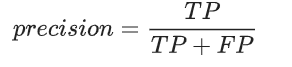

Расчитайте самостоятельно, вручную Precision, используя confusion matrix.

In [ ]:
precision_score(y_test, otvets_pred)

0.5737704918032787

**Точность и полнота:**
- чем выше точность, тем меньше ложных срабатываний
- чем выше полнота, тем меньше ложных пропусков

**Метрики выбираются в зависимости от задачи**

1. Определение мошеннеческих операций на банковских счетах - важнее полнота (лучше лишний раз проверим)
2. Раздаеляем самолеты на свои и вражеские - важнее точность

**F1 score** (F мера)

Сочетание precision и recall, дает некоторый компромисс между ними двумя, оценка F1 достигает своего наилучшего значения в 1 и худшее в 0.

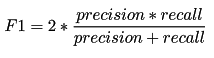

Рассчитайте самостоятельно F1

In [ ]:
f1_score(y_test, otvets_pred)

0.3125

Что еще почитать/посмотреть.

http://bazhenov.me/blog/2012/07/21/classification-performance-evaluation.html

http://blog.datalytica.ru/2018/05/blog-post.html

https://www.coursera.org/learn/vvedenie-mashinnoe-obuchenie/lecture/IVuAc/mietriki-kachiestva-klassifikatsii-1

https://habr.com/ru/company/ods/blog/328372/